In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
#import geopandas as gpd

import os
import requests, zipfile, io
import gc
import warnings
warnings.filterwarnings('ignore')

In [98]:
df1 = pd.read_csv('C:/Users/lsd92/Codes/capstone/csv_data/detected_1.csv')
df2 = pd.read_csv('C:/Users/lsd92/Codes/capstone/csv_data/detected_2.csv')
df3 = pd.read_csv('C:/Users/lsd92/Codes/capstone/csv_data/detected_3.csv')
pdList = [df1, df2, df3]  # List of your dataframes
combined_df = pd.concat(pdList)
#combined_df.head()
combined_df

,time,latitude,longitude,speed,original_file,image_file,obj_class_name,obj_class,x,y,w,h,confidences
0,2021-10-04 14:15:58,37.866575,122.254081,9.6560,GRMN_Bancroft_0.MP4,GRMN_Bancroft_0_5.jpg,bus,1,0.009375,0.592593,0.012500,0.044444,0.254490
1,2021-10-04 14:15:59,37.866600,122.254097,9.6560,GRMN_Bancroft_0.MP4,GRMN_Bancroft_0_55.jpg,bus,1,0.196875,0.412037,0.032292,0.046296,0.255477
2,2021-10-04 14:16:03,37.866789,122.254125,17.7027,GRMN_Bancroft_0.MP4,GRMN_Bancroft_0_171.jpg,bus,1,0.021615,0.433333,0.043229,0.235185,0.688805
3,2021-10-04 14:16:05,37.866919,122.254153,20.9214,GRMN_Bancroft_0.MP4,GRMN_Bancroft_0_217.jpg,bus,1,0.037240,0.405556,0.030729,0.046296,0.292600
4,2021-10-04 14:16:05,37.866919,122.254153,20.9214,GRMN_Bancroft_0.MP4,GRMN_Bancroft_0_218.jpg,bus,1,0.032292,0.405093,0.021875,0.047222,0.539737
...,...,...,...,...,...,...,...,...,...,...,...,...,...
707273,2021-11-15 16:22:00,37.868683,122.259597,11.2654,GRMN_Bancroft_999.MP4,GRMN_Bancroft_999_131.jpg,ups_truck,5,0.267448,0.534722,0.106771,0.160185,0.300762
707274,2021-11-15 16:22:00,37.868683,122.259597,11.2654,GRMN_Bancroft_999.MP4,GRMN_Bancroft_999_134.jpg,ups_truck,5,0.269010,0.531018,0.107813,0.160185,0.273287
707275,2021-11-15 16:22:13,37.868706,122.259658,0.0000,GRMN_Bancroft_999.MP4,GRMN_Bancroft_999_519.jpg,bus,1,0.419792,0.450000,0.018750,0.038889,0.312877
707276,2021-11-15 16:22:14,37.868706,122.259658,0.0000,GRMN_Bancroft_999.MP4,GRMN_Bancroft_999_550.jpg,ups_truck,5,0.297656,0.524074,0.089062,0.129630,0.279984


In [99]:
# remove later do a simple filter for now
combined_df = combined_df[combined_df['confidences'] >= 0.75]
combined_df.shape

(957260, 13)

In [100]:
combined_df['obj_class_name'].value_counts()

bus             839246
ups_truck        56531
fedex_truck      36589
amazon_truck     24894
Name: obj_class_name, dtype: int64

In [101]:
# add date week and hour infor
date = pd.to_datetime(combined_df['time']).dt.tz_localize('UTC').dt.tz_convert('US/Pacific')
combined_df['year'] = date.dt.year
combined_df['month'] = date.dt.month
combined_df['day'] = date.dt.day
combined_df['weekday'] = date.dt.weekday
combined_df['hour'] = date.dt.hour

In [102]:
display(combined_df['latitude'].value_counts())
display(combined_df['longitude'].value_counts())

37.868664    21528
37.868711    21226
37.868725    13889
37.868689    12664
37.868703    12462
             ...  
37.866736        1
37.866883        1
37.866386        1
37.866872        1
37.866958        1
Name: latitude, Length: 1040, dtype: int64

122.259742    13683
122.259708    12932
122.259703    11354
122.259739    10729
122.259689    10276
              ...  
122.258178        1
122.267011        1
122.256358        1
122.264719        1
122.262339        1
Name: longitude, Length: 4723, dtype: int64

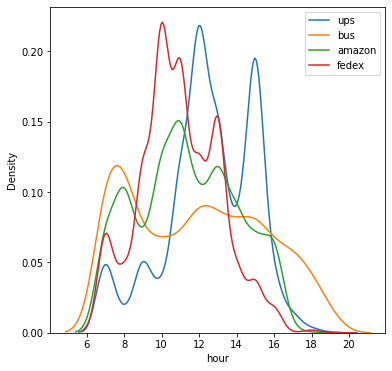

In [103]:
plt.figure(figsize=(6, 6))
ups = combined_df[['hour', 'obj_class_name']].query("obj_class_name == 'ups_truck'")
bus = combined_df[['hour', 'obj_class_name']].query("obj_class_name == 'bus'")
amazon = combined_df[['hour', 'obj_class_name']].query("obj_class_name == 'amazon_truck'")
fedex = combined_df[['hour', 'obj_class_name']].query("obj_class_name == 'fedex_truck'")

bins = [i for i in range(6,20)]
kde_kws = {"bw": 0.2}

sns.kdeplot(data = ups['hour'], bw=0.2, label='ups')
sns.kdeplot(data = bus['hour'], bw=0.2, label='bus')
sns.kdeplot(data = amazon['hour'], bw=0.2, label='amazon')
sns.kdeplot(data = fedex['hour'], bw=0.2, label='fedex')
plt.legend();

<AxesSubplot:xlabel='hour', ylabel='Density'>

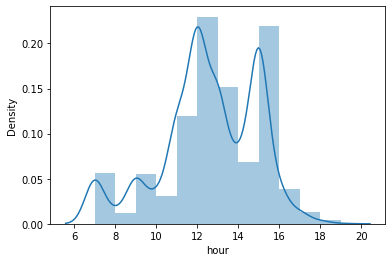

In [104]:
sns.distplot(ups['hour'], bins=bins, kde=True, kde_kws=kde_kws, label='ups')

<AxesSubplot:xlabel='hour', ylabel='Density'>

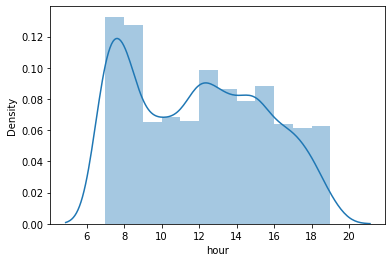

In [105]:
sns.distplot(bus['hour'], bins=bins, kde=True, kde_kws=kde_kws, label='bus')

<AxesSubplot:xlabel='hour', ylabel='Density'>

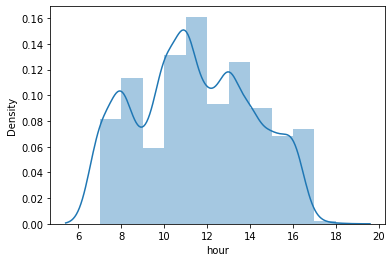

In [106]:
sns.distplot(amazon['hour'], bins=bins, kde=True, kde_kws=kde_kws, label='amazon')

<AxesSubplot:xlabel='hour', ylabel='Density'>

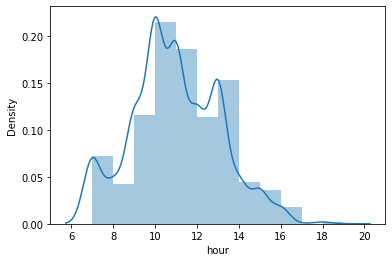

In [107]:
sns.distplot(fedex['hour'], bins=bins, kde=True, kde_kws=kde_kws, label='fedex')

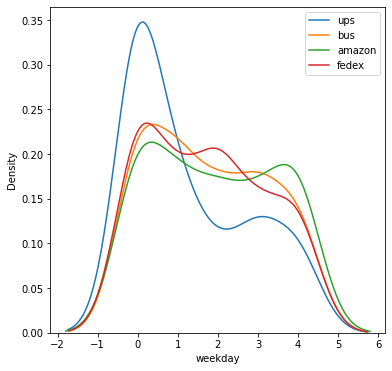

In [108]:
plt.figure(figsize=(6, 6))
ups = combined_df[['weekday', 'obj_class_name']].query("obj_class_name == 'ups_truck'")
bus = combined_df[['weekday', 'obj_class_name']].query("obj_class_name == 'bus'")
amazon = combined_df[['weekday', 'obj_class_name']].query("obj_class_name == 'amazon_truck'")
fedex = combined_df[['weekday', 'obj_class_name']].query("obj_class_name == 'fedex_truck'")


sns.kdeplot(data = ups['weekday'], bw=0.4, label='ups')
sns.kdeplot(data = bus['weekday'], bw=0.4, label='bus')
sns.kdeplot(data = amazon['weekday'], bw=0.4, label='amazon')
sns.kdeplot(data = fedex['weekday'], bw=0.4, label='fedex')
plt.legend();

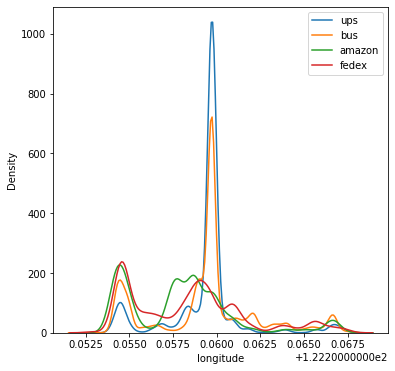

In [109]:
plt.figure(figsize=(6, 6))
combined_df = combined_df[combined_df['longitude'] <= 123]
ups = combined_df[['longitude', 'obj_class_name']].query("obj_class_name == 'ups_truck'")
bus = combined_df[['longitude', 'obj_class_name']].query("obj_class_name == 'bus'")
amazon = combined_df[['longitude', 'obj_class_name']].query("obj_class_name == 'amazon_truck'")
fedex = combined_df[['longitude', 'obj_class_name']].query("obj_class_name == 'fedex_truck'")

bins = [i for i in range(6,20)]
kde_kws = {"bw": 0.2}

sns.kdeplot(data = ups['longitude'],  label='ups')
sns.kdeplot(data = bus['longitude'],  label='bus')
sns.kdeplot(data = amazon['longitude'],  label='amazon')
sns.kdeplot(data = fedex['longitude'],  label='fedex')
plt.legend();